In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

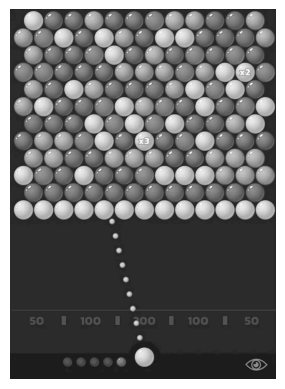

In [2]:
# Carga la imagen
ballscol = cv2.imread('../../IMAGES/practica2.1_kmeans_2.png', 1)
ballsc = cv2.cvtColor(ballscol, cv2.COLOR_BGR2RGB)

balls = cv2.imread('../../IMAGES/practica2.1_kmeans_2.png', 0)

plt.axis("off")
plt.imshow(balls, cmap='gray')

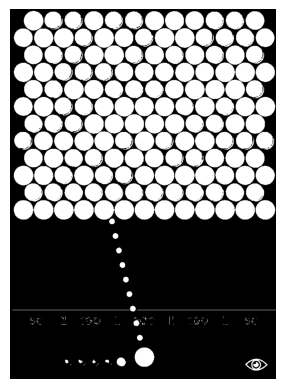

In [3]:
# Binarizacion
_, imgBin = cv2.threshold(balls, 84, 255, cv2.THRESH_BINARY)

plt.axis("off")
plt.imshow(imgBin, cmap='gray')

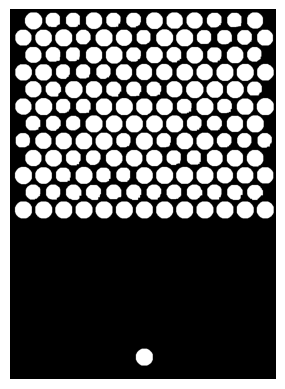

In [4]:
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(imgBin, kernel, iterations=4)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=3)


plt.axis("off")
plt.imshow(img_dilation, cmap='gray')

(963, 693, 3)


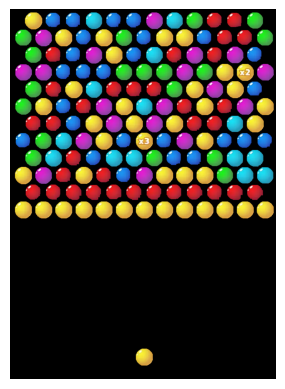

In [5]:
cv2.imwrite("../../IMAGES/piv.jpg", img_dilation)
img_dilation2 = cv2.imread('../../IMAGES/piv.jpg', 1)

masked3 = cv2.bitwise_and(img_dilation2, ballsc)

print(masked3.shape)

plt.axis("off")
plt.imshow(masked3, cmap='gray')

(192, 138, 3)


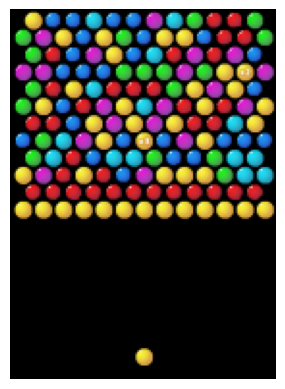

In [6]:
escala = 20

alto = int(masked3.shape[0]*escala/100)
ancho = int(masked3.shape[1]*escala/100)

newdim = (ancho,alto)

new = cv2.resize(masked3, newdim, interpolation=cv2.INTER_AREA)

print(new.shape)

plt.axis("off")
plt.imshow(new, cmap='gray')

#masked3 = np.copy(new)

In [80]:
# Funcion para calcular la distancia entre los pixeles mas cercanos a un color
def distanciaColor(pixelr, r, pixelg, g, pixelb, b):
    return np.sqrt((pixelr - r) ** 2 + (pixelg - g) ** 2 + (pixelb - b) ** 2)

In [81]:
# Funcion para obtener los pixeles mas cercanos a un color
def getUsefulPixel(red, green, blue, color, accepted):
    
    dim = red.shape # Tamaño de la imagen vectorizada
    filteredImage = np.zeros(dim) # Nuevo vector

    # Utilizar divide y vencerás
    def divide_and_conquer(start, end):
        if start >= end:
            distance = distanciaColor(color[0], red[start], color[1], green[start], color[2], blue[start])
            if distance < accepted:
                filteredImage[start] = 255
        else:
            mid = (start + end) // 2
            divide_and_conquer(start, mid)
            divide_and_conquer(mid + 1, end)

    divide_and_conquer(0, len(red) - 1)
    
    return filteredImage

In [82]:
#Funcion que obtiene los frames con el color deseado
def findColor(image, color, accepted):
    
    # Tamaño de la imagen
    wid, hght, canal = image.shape 
    
    # Recuperar canales
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]

    # Vectorizar cada canal
    redV = red_channel.flatten()
    greenV = green_channel.flatten()
    blueV = blue_channel.flatten()

    # Pasar los canales vectorizados a la funcion
    filteredImage = getUsefulPixel(redV, greenV, blueV, color, accepted) # Obtener el vector
    filteredImage = np.reshape(filteredImage, (wid, hght))

    return filteredImage

In [83]:
def area_color(img, img_bin):
    newImage = np.zeros_like(img)

    wid, hght, canal = img.shape
    for i in range(wid):
        for j in range(hght):
            if(img_bin[i,j] == 255):
                newImage[i,j,0] = 255
                newImage[i,j,1] = 255
                newImage[i,j,2] = 255
    return newImage

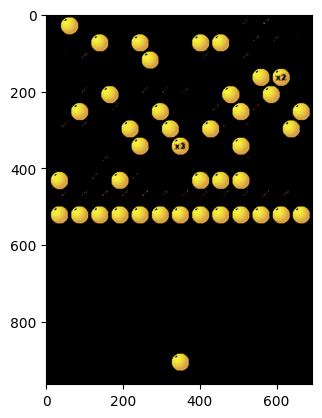

In [88]:
# Color al que queremos aproximar
# Amarillo
colorDetected = np.array([243, 224, 63])
# Rango de color aceptado
acceptedColor = 120

filteredImage = findColor(masked3, colorDetected, acceptedColor)
mascara = area_color(masked3, filteredImage)
bichota = cv2.bitwise_and(mascara, masked3)
plt.imshow(bichota)

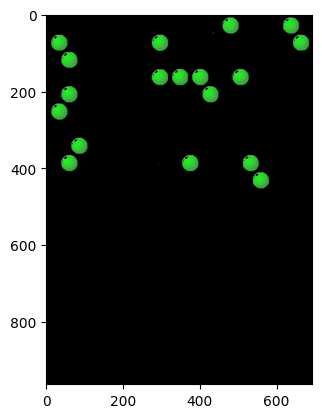

In [94]:
# Color al que queremos aproximar
# Verde
colorDetected = np.array([39, 231, 41])
# Rango de color aceptado
acceptedColor = 150

filteredImage = findColor(masked3, colorDetected, acceptedColor)
mascara = area_color(masked3, filteredImage)
bichota = cv2.bitwise_and(mascara, masked3)
plt.imshow(bichota)

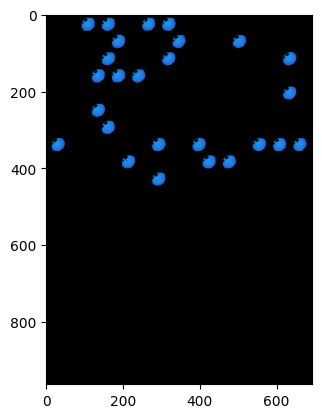

In [103]:
# Color al que queremos aproximar
# Azul cielo
colorDetected = np.array([39, 125, 228])
# Rango de color aceptado
acceptedColor = 40

filteredImage = findColor(masked3, colorDetected, acceptedColor)
mascara = area_color(masked3, filteredImage)
bichota = cv2.bitwise_and(mascara, masked3)
plt.imshow(bichota)

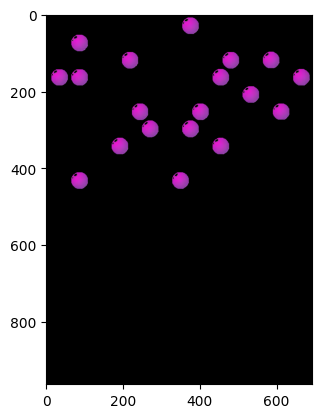

In [106]:
# Color al que queremos aproximar
# Rosa
colorDetected = np.array([209, 43, 205])
# Rango de color aceptado
acceptedColor = 100

filteredImage = findColor(masked3, colorDetected, acceptedColor)
mascara = area_color(masked3, filteredImage)
bichota = cv2.bitwise_and(mascara, masked3)
plt.imshow(bichota)

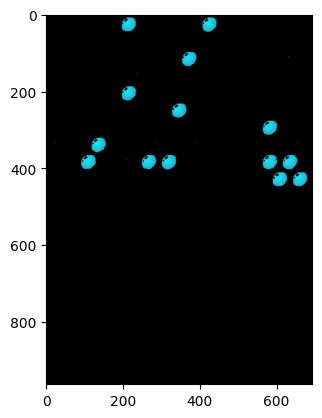

In [112]:
# Color al que queremos aproximar
# Cyan
colorDetected = np.array([31, 213, 236])
# Rango de color aceptado
acceptedColor = 60

filteredImage = findColor(masked3, colorDetected, acceptedColor)
mascara = area_color(masked3, filteredImage)
bichota = cv2.bitwise_and(mascara, masked3)
plt.imshow(bichota)

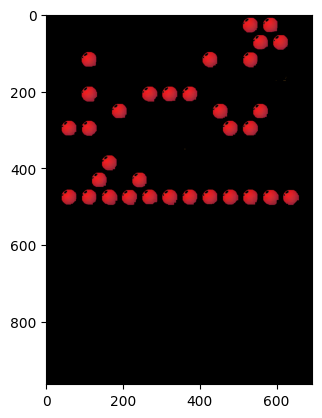

In [115]:
# Color al que queremos aproximar
# Rojo
colorDetected = np.array([216, 41, 43])
# Rango de color aceptado
acceptedColor = 90

filteredImage = findColor(masked3, colorDetected, acceptedColor)
mascara = area_color(masked3, filteredImage)
bichota = cv2.bitwise_and(mascara, masked3)
plt.imshow(bichota)